In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
import sys

In [3]:
sys.path.append('../')
from visualization_utils import *

In [5]:
RL_bounds = np.load('../../../data/volume/topdown_RL_bounds.npy')
AL_bounds = np.load('../../../data/volume/topdown_AL_bounds.npy')

In [6]:
df_neuron = pd.read_pickle('../../../data/data_tables/df_cluster.pkl')
df_morphos = pd.read_pickle('../../../data/data_tables/df_morphos.pkl')

In [22]:
df_neuron = df_neuron[df_neuron.assigned_layer == 'L4']
df = pd.merge(
    df_neuron,
    df_morphos[['segment_id', 'split_index', 'soma_x', 'soma_z']],
    on=['segment_id', 'split_index'],
)

In [23]:
len(df)

7775

#### Assign tuftedness
Based on visual inspection of example neurons of clusters

In [24]:
tuftedness = []
for v in df['cluster_L4'].values:

    if v in [1, 2, 4, 13]:
        tuftedness.append('tufted')
    elif v in [3, 5, 7, 8, 9, 10, 11, 14]:
        tuftedness.append('small_tuft')
    elif v in [6, 12, 15]:
        tuftedness.append('atufted')
    else:
        tuftedness.append('nan')

In [25]:
df['tuftedness'] = tuftedness

In [26]:
# Fraction of atufted/ small tuft/ tuft.
np.unique(df['tuftedness'], return_counts=True)[1] / len(df['tuftedness'])

array([0.18083601, 0.53247588, 0.2866881 ])

In [27]:
titles = ['Atufted', 'Small tuft', 'Tufted']

In [28]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.linewidth'] = 2

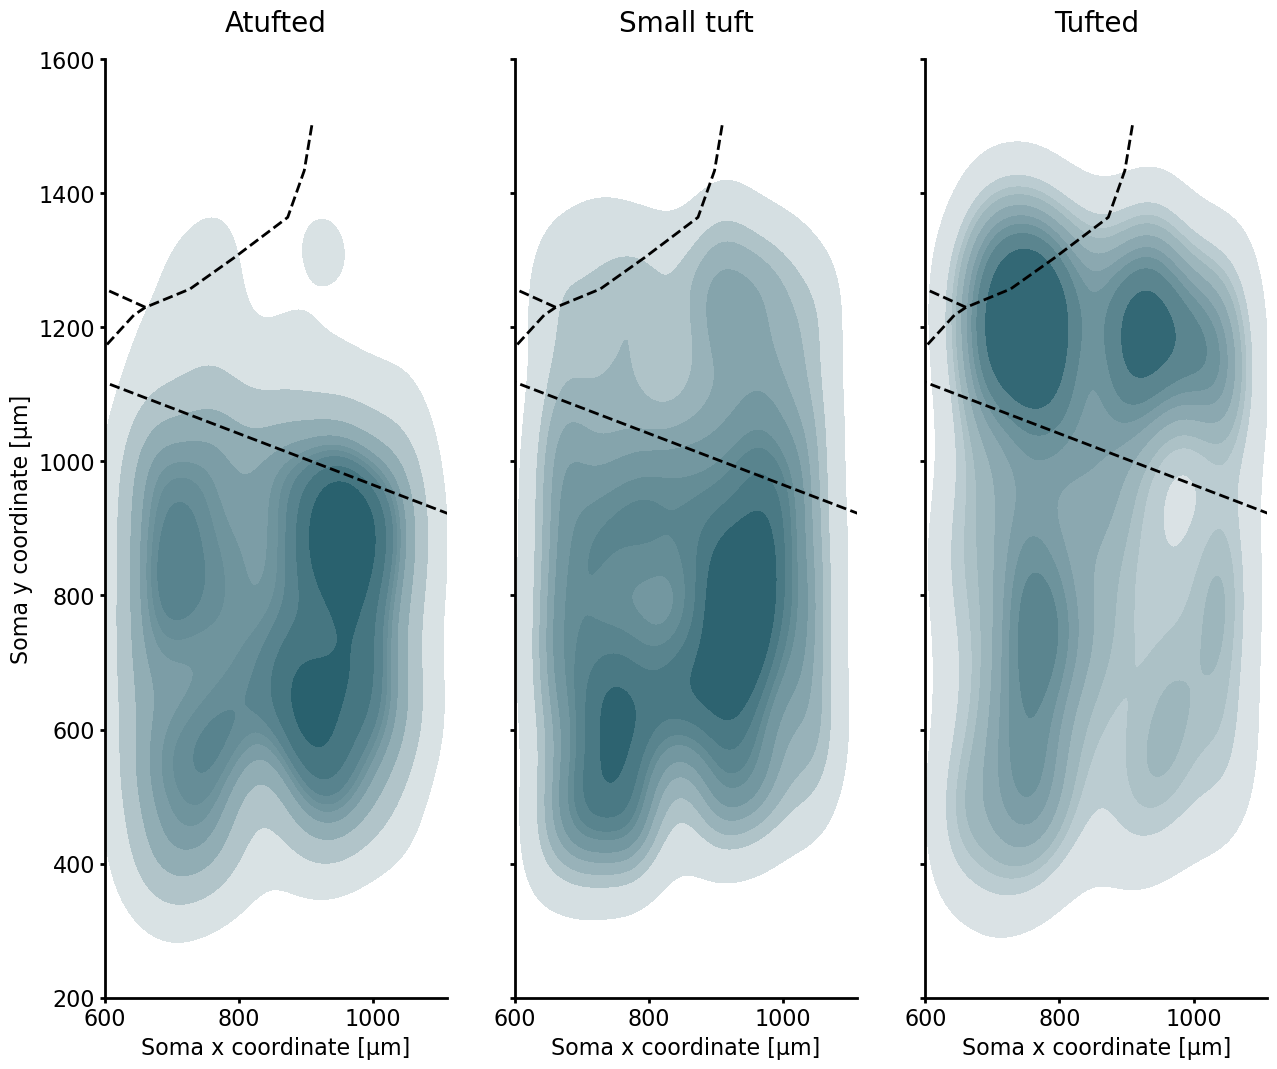

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15), sharex=True, sharey=True)

for i, tuft in enumerate(['atufted', 'small_tuft', 'tufted']):
    sns.kdeplot(
        data=df[df['tuftedness'] == tuft],
        x='soma_z',
        y='soma_x',
        ax=ax[i],
        legend=False,
        fill=True,
        cmap=sns.light_palette(cm.batlow.colors[50], as_cmap=True),
    )

    ax[i].plot(
        RL_bounds[:, 1],
        RL_bounds[:, 0],
        '--',
        label='RL_bounds',
        color='black',
        linewidth=2,
    )
    ax[i].plot(
        AL_bounds[:, 1],
        AL_bounds[:, 0],
        '--',
        label='AL_bounds',
        color='black',
        linewidth=2,
    )
    ax[i].set_aspect('equal')

    ax[i].set_xlabel('Soma x coordinate [μm]', fontsize=16)
    ax[i].set_ylabel('Soma y coordinate [μm]', fontsize=16)
    ax[i].set_title(titles[i], fontsize=20, pad=20)
    ax[i].set_xlim([600, 1110])
    ax[i].set_ylim([200, 1600])
    ax[i].xaxis.set_tick_params(width=2)
    ax[i].yaxis.set_tick_params(width=2)
sns.despine()

# plt.savefig('figures/fig6B_dist_tuft_L4.pdf', bbox_inches='tight', transparent=True)